In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [8]:
iris = pd.read_csv("../../assets/datasets/iris.csv")
iris.head(n=5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = pd.DataFrame(data=iris, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'])

In [10]:
df.sample(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
119,6.0,2.2,5.0,1.5,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor
49,5.0,3.3,1.4,0.2,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
17,5.1,3.5,1.4,0.3,Iris-setosa
102,7.1,3.0,5.9,2.1,Iris-virginica


In [12]:
def name_to_numeric(x):
    if x == "Iris-setosa":
        return  1
    if x == "Iris-virginica":
        return  2
    if x == "Iris-versicolor":
        return 3

In [15]:
df['Name_num'] = df["Name"].apply(name_to_numeric)
del df["Name"]

In [17]:
df.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name_num
66,5.6,3.0,4.5,1.5,3
47,4.6,3.2,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1
6,4.6,3.4,1.4,0.3,1
13,4.3,3.0,1.1,0.1,1


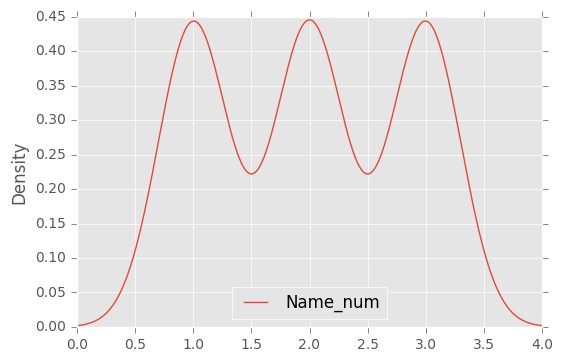

In [20]:
df.plot(kind='density',x='SepalLength',y='Name_num')

In [23]:
dn1 = df.as_matrix(columns = None)

In [24]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dn1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [26]:
metrics.silhouette_score(dn1, labels, metric='euclidean')

0.6956509321199762